In [58]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

cv2.__version__

'4.4.0'

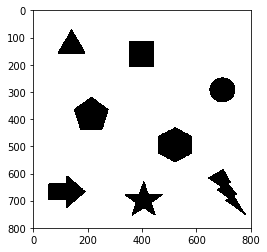

In [3]:
#image = cv2.imread('Images/test/frame00005.jpg',0)
image = cv2.imread('D:/tmp/shapes.png',0)
plt.imshow(image, cmap='gray')

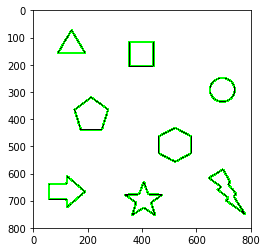

In [40]:
blur = cv2.medianBlur(image,5)
thresh0 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY,11,2)
cont0, hierarchy0 = cv2.findContours(thresh0, 1, 2)
cont0 = cont0[:-1]
img0 = cv2.cvtColor(thresh0, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img0, cont0, -1, (0,255,0), 2)
plt.imshow(img0, cmap='gray')

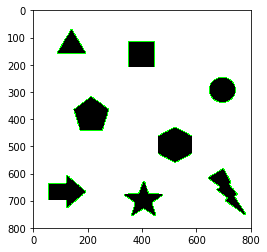

In [5]:
blur = cv2.GaussianBlur(image,(5,5),0)
_, thresh1 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cont1, hierarchy1 = cv2.findContours(thresh1, 1, 2)
cont1 = cont1[:-1]
img1 = cv2.cvtColor(thresh1, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img1, cont1, -1, (0,255,0), 2)
plt.imshow(img1, cmap='gray')

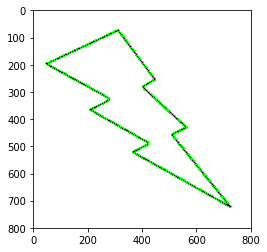

In [84]:
#image = cv2.imread('Images/test/frame00005.jpg',0)
image = cv2.imread('D:/tmp/lightning.png',0)
plt.imshow(image, cmap='gray')

blur = cv2.medianBlur(image,5)
thresh2 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY,11,2)
cont2, hierarchy2 = cv2.findContours(thresh2, 1, 2)
cont2 = cont2[:-1]
img2 = cv2.cvtColor(thresh2, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img2, cont2, -1, (0,255,0), 2)
plt.imshow(img2, cmap='gray')

In [55]:
c = cont2[1]

M = cv2.moments(c)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
area = cv2.contourArea(c)
perimeter = cv2.arcLength(c,True)
epsilon = 0.1*cv2.arcLength(c,True)
approx = cv2.approxPolyDP(c,epsilon,True)
hull = cv2.convexHull(c)

x,y,w,h = cv2.boundingRect(c)
rect = np.array([[x,y],[x+w,y],[x+w,y+h],[x,y+h]])

min_rect = cv2.minAreaRect(c)
box = cv2.boxPoints(min_rect)
box = np.int0(box)

(x,y),radius = cv2.minEnclosingCircle(c)
center = (int(x),int(y))
radius = int(radius)

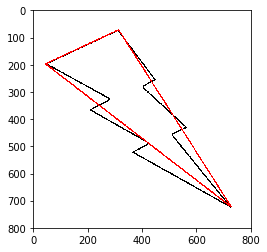

In [51]:
img2 = cv2.cvtColor(thresh2, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img2, [approx], -1, (255,0,0), 3)
plt.imshow(img2, cmap='gray')

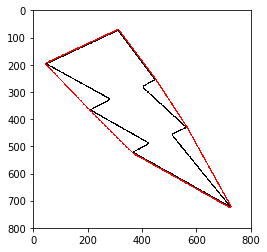

In [50]:
img2 = cv2.cvtColor(thresh2, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img2, [hull], -1, (255,0,0), 3)
plt.imshow(img2, cmap='gray')

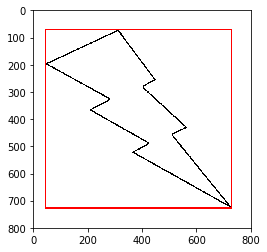

In [52]:
img2 = cv2.cvtColor(thresh2, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img2, [rect], -1, (255,0,0), 3)
plt.imshow(img2, cmap='gray')

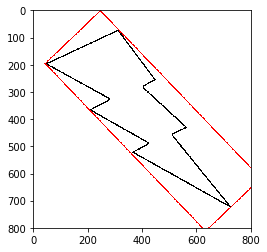

In [53]:
img2 = cv2.cvtColor(thresh2, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img2, [box], -1, (255,0,0), 3)
plt.imshow(img2, cmap='gray')

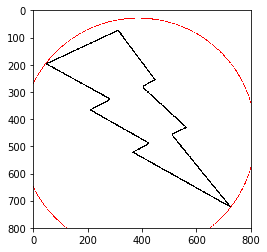

In [56]:
img2 = cv2.cvtColor(thresh2, cv2.COLOR_GRAY2BGR)
cv2.circle(img2,center,radius,(255,0,0),2)
plt.imshow(img2, cmap='gray')

In [81]:
circle = []
for a in np.linspace(0.0, 2*math.pi, num=250):
    x = center[0] + radius*math.cos(a)
    y = center[1] + radius*math.sin(a)
    circle.append([x,y])
circle = np.array(circle, dtype='int64')

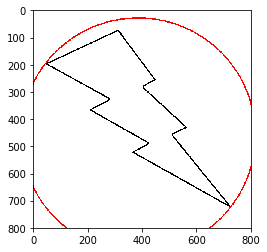

In [82]:
img2 = cv2.cvtColor(thresh2, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img2, [circle], -1, (255,0,0), 3)
plt.imshow(img2, cmap='gray')

In [79]:
box

array([[633, 811],
       [ 44, 196],
       [247,   2],
       [836, 617]], dtype=int64)

In [78]:
circle.shape

(250, 2)